In [201]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [64]:
from tensorflow.examples.tutorials.mnist import input_data

In [65]:
mnist = input_data.read_data_sets("data/fashion", one_hot = True, source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


In [72]:
# 학습 이미지 정보 출력
print('Train image shape : ', mnist.train.images.shape)
print('Train label shape : ', mnist.train.labels.shape)

Train image shape :  (55000, 784)
Train label shape :  (55000, 10)


In [73]:
# 테스트 정보 출력
print('Test image shape : ', mnist.test.images.shape)
print('Test label shape : ', mnist.test.labels.shape)

Test image shape :  (10000, 784)
Test label shape :  (10000, 10)


##### 임의의 이미지를 화면에 출력

In [74]:
# 테스트 이미지 중 하나를 선정하기 위해 랜덤하게 값 생성
print(mnist.test.num_examples)

10000


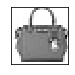

In [197]:
fig = plt.figure()
r = random.randint(0, mnist.test.num_examples-1)
subplot = fig.add_subplot(3, 5, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(mnist.test.images[r].reshape(28, 28), cmap = plt.cm.gray_r)
plt.show()

### 신경망 구성하기

In [78]:
X = tf.placeholder(tf.float32, shape = [None, 784])
Y = tf.placeholder(tf.float32, shape = [None, 10])

In [82]:
W1 = tf.Variable(tf.truncated_normal([784, 512]))
b1 = tf.Variable(tf.truncated_normal([512]))
Y1 = tf.nn.relu(tf.matmul(X, W1) + b1)

In [85]:
W2 = tf.Variable(tf.truncated_normal([512, 128]))
b2 = tf.Variable(tf.truncated_normal([128]))
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)

In [87]:
# 마지막 신경망 : 출력값이 label의 10(열)과 같아야 한다.
W3 = tf.Variable(tf.truncated_normal([128, 10]))
b3 = tf.Variable(tf.truncated_normal([10]))
logits = tf.matmul(Y2, W3) + b3

In [88]:
hypothesis = tf.nn.relu(logits)

In [90]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))

In [105]:
train = tf.train.AdamOptimizer(0.01).minimize(cost)

##### 학습 실시

In [106]:
sess = tf.Session()

In [107]:
init = tf.global_variables_initializer()

In [108]:
sess.run(init)

In [109]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [195]:
for epoch in range(15) :
    total_cost = 0
    x_batch, y_batch = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([train, cost], feed_dict = {X:x_batch, Y:y_batch})
    
    total_cost += cost_val
    
    print('Epoch : ', epoch, ', total_cost : ', total_cost/total_batch)
print('학습 완료!')

Epoch :  0 , total_cost :  0.002939345186406916
Epoch :  1 , total_cost :  0.0029087281227111817
Epoch :  2 , total_cost :  0.0019759995287114925
Epoch :  3 , total_cost :  0.0021697631749239836
Epoch :  4 , total_cost :  0.002096944722262296
Epoch :  5 , total_cost :  0.0015842711925506592
Epoch :  6 , total_cost :  0.002076771476052024
Epoch :  7 , total_cost :  0.003491373062133789
Epoch :  8 , total_cost :  0.0024592200192538175
Epoch :  9 , total_cost :  0.0017943712798031894
Epoch :  10 , total_cost :  0.0019108273766257546
Epoch :  11 , total_cost :  0.00211641246622259
Epoch :  12 , total_cost :  0.0017114328254352917
Epoch :  13 , total_cost :  0.0020448968627236105
Epoch :  14 , total_cost :  0.0026442319696599785
학습 완료!


In [196]:
is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
sess.run(accuracy, feed_dict = {X:mnist.test.images, Y:mnist.test.labels})

0.5941

##### 학습한 후 테스트

In [194]:
# Dictionary of labels
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

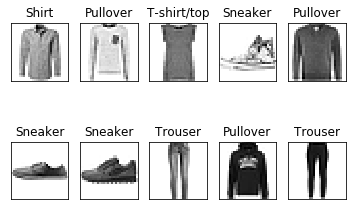

In [212]:
fig = plt.figure()
for i in range(10) :
    r = random.randint(0, mnist.test.num_examples-1)
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title("%s" % label_dict[np.argmax(mnist.test.labels[r])])
    subplot.imshow(mnist.test.images[r].reshape(28, 28), cmap = plt.cm.gray_r)

plt.show()